"Geo Data Science with Python" 
### Notebook Exercise 6d

---

# Datetime, NetCDF and Plotting Maps

If you work in teams, please indicate your colaborators below!

In [ ]:
NAME = ""
COLLABORATORS = ""

---
## Part A: Translate number of days into date objects and use them for a plot 

(11 points)


For this part, we have defined a numpy array `noDays` and `temperatures` in the code cell below. This is a fictitious datasets of temperature records given for days of the year 1999.

In [13]:
# given number of days since January 1, 1999
import numpy as np
noDays = np.array([15., 18., 38., 49., 55., 60., 100., 150., 244., 300., 364.])
temperatures = np.array([10., 12., 12., 18., 19., 20., 22., 14., 12, 9., 6.])

---
### Task A.1

(4 points)

The array `noDays` contains time stamps for the temperture records, provided in the format of numbers of days since January 1, 1999. Convert the time entries in the array to actual dates using appropriate functions of the module `Datetime`. For that you need to:

* Read about the function timedelta from the datetime module https://docs.python.org/3/library/datetime.html. 
* Import the needed module and/or functions
* Use an iteration or list comprehension that adds the date January 1, 1999 to each item in the array `noDays`. Use the timedelta function.
* Assign the resulting dates to a list of the name `noDays_date`

Note: this task does only practice usage of the datetime module (not the netcdf module).

In [118]:
"""Add you code below"""
from datetime import datetime 
from datetime import timedelta 

# creating the reference date 
startDate = datetime.strptime ('1999_01_01', '%Y_%m_%d')

# converting noDays elements into dates and adding them to the reference
noDays_date = [startDate + timedelta(i) for i in noDays] 

In [119]:
# Print your result to test your code
[print(e) for e in noDays_date]

1999-01-16 00:00:00
1999-01-19 00:00:00
1999-02-08 00:00:00
1999-02-19 00:00:00
1999-02-25 00:00:00
1999-03-02 00:00:00
1999-04-11 00:00:00
1999-05-31 00:00:00
1999-09-02 00:00:00
1999-10-28 00:00:00
1999-12-31 00:00:00


[None, None, None, None, None, None, None, None, None, None, None]

---
### Task A.2

(2 points)

The fictitious data set from above defines a second array of name `temperature`. Plot this fictitious dataset using the time stamps you have just translated to date objects and saved in the variable `noDays_date`. For that do the following:

* Import the pyplot package 
* Make a very simple plot of the temperature dataset, using the dates from Task 1, to make sure your x-axis labels provide real dates.

There is no need to further label the plot.

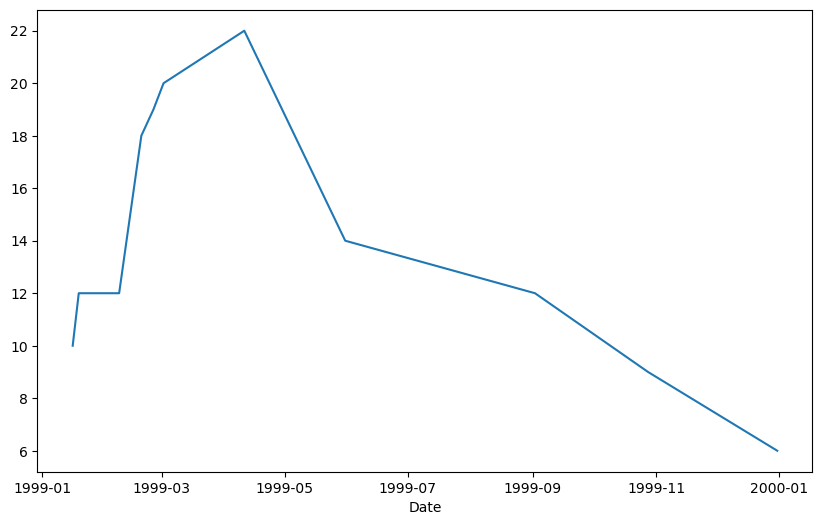

In [28]:
"""Add you code below"""

from matplotlib import pyplot as plt 

# creating figure and plotting data 
fig, ax = plt.subplots(1, figsize=(10,6))

# Plot data
ax.plot(noDays_date, temperatures) 

# Axis label
ax.set_xlabel('Date')

plt.show()


---
### Task A.3

(5 points)

**This task is independent from the task above**, and practices usage of netCDF time values.

Below, the time variable of the netcdf file `tos_O1_2001-2002.nc` is read into the variable ncTime. (The file should locate in the Lessons folder of the material repository geosf21_material.)

Find a way to convert the netCDF time values `ncTime` into a datetime object `ncTime_dates`. The following workflow is a suggestion:

* import an appropriate netCDF4 function
* read the correct time unit from the dataset
* use the netCDF4 function num2date and the method strftime() to convert the netCDF4 date array into a list of strings
* convert the list of string objects into datetime dates by combining list comprehensions with the function split for converting the date string into datetime dates, multiple steps might be necessary.

Refer to the reference of the datetime module and datetime function, if needed.


In [30]:
from netCDF4 import Dataset 
data = Dataset('./tos_O1_2001-2002.nc')
ncTime = data.variables['time'][:].data

In [49]:
"""Add you code below"""
# importing the relevant modules
from netCDF4 import num2date
from datetime import datetime 

# reading the time unit
timeUnits = data.variables['time'].units

# converting into dates 
timeDates = num2date(ncTime, timeUnits)

# converting the dates to strings 
ncDates = [i.strftime('%Y-%m-%d') for i in timeDates]

print(ncDates)


['2001-01-16', '2001-02-15', '2001-03-17', '2001-04-16', '2001-05-16', '2001-06-15', '2001-07-15', '2001-08-14', '2001-09-13', '2001-10-13', '2001-11-12', '2001-12-12', '2002-01-11', '2002-02-10', '2002-03-12', '2002-04-11', '2002-05-11', '2002-06-10', '2002-07-10', '2002-08-09', '2002-09-08', '2002-10-08', '2002-11-07', '2002-12-07']


---
## Part B: Import a netCDF file, calculate a map statistic and plot the result 

(15 points)

For this task, you should import the netCDF file `tos_O1_2001-2002.nc` and calculate the maximum sea surface temperature during the year 2001 for each gridpoint. Then print the resulting map. For guidance and to receive full points, follow exactly these steps:

* Import the package `Dataset` from the module netCDF4 (1 point)
* Read the netcdf dataset from the file `tos_O1_2001-2002.nc` and save the content to the variable `data` (1 point)
* Print out the information of the data set to get an overview
* Assign the data content to the variable `lat`, `lon`, `time`, `tos`. Consider to select the correct object from the masked arrays, if needed (extract the data object). (2 points)
* Close the netCDF dataset/file (1 point)
* Convert the 1D lat/lon arrays to a meshgrid arrays and save them to the variables `lat_grid` and `lon_grid` (2 points)
* Converting missing values in '`tos` data to `np.nan` (convert to Celsius or leave at Kelvin, as you prefer) (1 point)
* Iterate over the data array `tos` in the correct way, to retrieve the maximum sea surface temperature during the year 2001 for each data pixel and save the results in a new map `tos_max2001` (6 points)
* Make a simple plot the new map `tos_max` with labeled coordinate axes and a colorbar with the colormap `'viridis'`. No further labeling needed (1 point)

In [116]:
"""Add you code below"""

from netCDF4 import Dataset 
import numpy as np 

# reading data in 
data = Dataset('./tos_O1_2001-2002.nc')

print (data)

# reading time, lat, lon and tos into arrays
time = data.variables['time'][:].data
lat = data.variables['lat'][:].data
lon = data.variables['lon'][:].data
tos = data.variables['tos'][:].data
tos_mask = data.variables['tos'][:].mask

# closing the file 
data.close()

# creating the 2D array 
lon_grid, lat_grid = np.meshgrid(lon, lat)

# converting missing values to nan
tos[tos==1e20] = np.nan

# converting temperatures to Celsius
tos = tos - 273.15

# length of array restricted to 12 for first year (2001)
num_tos = 12

# empty array
tos_max2001 = np.zeros(num_tos)

# tos_max2001 = np.array([np.nanmax(tos[i]) for i in range (num_tos)] )

# creating array of max values
for i in range(num_tos):
    tos_max2001[i] = np.nanmax(tos[i])

plt.pcolormesh(lon_grid, lat_grid, tos_max2001, shading = 'auto', cmap = 'viridis')
# not sure what I'm doing wrong here


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: IPSL  model output prepared for IPCC Fourth Assessment SRES A2 experiment
    institution: IPSL (Institut Pierre Simon Laplace, Paris, France)
    source: IPSL-CM4_v1 (2003) : atmosphere : LMDZ (IPSL-CM4_IPCC, 96x71x19) ; ocean ORCA2 (ipsl_cm4_v1_8, 2x2L31); sea ice LIM (ipsl_cm4_v
    contact: Sebastien Denvil, sebastien.denvil@ipsl.jussieu.fr
    project_id: IPCC Fourth Assessment
    table_id: Table O1 (13 November 2004)
    experiment_id: SRES A2 experiment
    realization: 1
    cmor_version: 0.96
    Conventions: CF-1.0
    history: YYYY/MM/JJ: data generated; YYYY/MM/JJ+1 data transformed  At 16:37:23 on 01/11/2005, CMOR rewrote data to comply with CF standards and IPCC Fourth Assessment requirements
    references: Dufresne et al, Journal of Climate, 2015, vol XX, p 136
    comment: Test drive
    dimensions(sizes): lon(180), lat(170), time(24), bnds(2)
    variables(dime

ValueError: not enough values to unpack (expected 2, got 1)

---
## Part C: Print an image with adjusted axes labels (optional)

(10 points, extra credit)

For this task, we are providing you with some code below, which imports the shaded relief from the file `'./US_MSR_lowRes_terrain.dat'` to the variable `reliefUS`, defines related metadata as well as meshgrids for the `x` and `y` coordinates of the shaded relief. You are also given the coordinate bounds for an area of the Northeast (NE) of the United States, which you should slice out of the shaded relief data set. The bounds are given by the assigned variables `latMin`, `latMax`, `lonMin` and `lonMax`, below. You should also plot the new data frame in a matplotlib image with correctly labeled coordinate axes. In addition, plot the location of the city of New York and two further cities of your choice into the map. For that you need to:

* Find correct indicees for the bounding box coordinates in the coordinate arrays `x_col` and `y_col` (2 points)
* Reduce all neccessary arrays to bounding box using those indicees (2 points)
* Plotting the relief data with labeled axes: coordinates (2 points)
* Plotting the relief with a reversed gray scale colorbar (1 point)
* Plot the location of the city New York, with the coordinates `NY_lat` and `NY_lon` using a colored dot (1 point)
* Label the dot for the city of New York with its name (1 point)
* Find coordinates of two more cities in the map frame and add colored dots for their locations (1 point)

Fill your code in the answer code cell below. Make sure to comment your code well!!! Use exaclty the variable names as stated in the task.

In [117]:
# provided code to:
#    import the relief data, 
#    define the coordinate arrays (meshgrids)
#    define new bounding box for reduced data fram

import numpy as np

# reading the file using numpy function genfromtxt, skipping header
filename = "./US_MSR_lowRes_terrain.dat"  # USA Shaded relief data
reliefUS = np.genfromtxt(filename, delimiter=' ', skip_header=6) 

# defining information from file header
xllcorner = -129.9727818920000004
yllcorner =  15.5224817269999988
cellsize  =   0.04001
[yDim,xDim] = reliefUS.shape

# Creating meshgrids x and y that hold lon and lat coordinates for each data point
x_col = np.empty(reliefUS.shape)
y_col = np.empty(reliefUS.shape)
x_col = np.linspace(xllcorner,xllcorner+cellsize*(xDim+1), xDim)
y_col = np.linspace(yllcorner,yllcorner+cellsize*(yDim+1), yDim)
y_col = np.flip(y_col)
x, y = np.meshgrid(x_col,y_col)

# defining a new bounding box for NE USA to be extracted from the shaded relief image
latMin = 36
latMax = 50
lonMin = -98
lonMax = -65

# coordinates New York
NY_lat = 40.730610
NY_lon = -73.935242

OSError: ./US_MSR_lowRes_terrain.dat not found.

In [ ]:
"""Add you code below"""

### YOUR CODE HERE


---
If you are satisfied with your code, back it up and submit it to your homework repository.